In [1]:
import numpy as np

import matplotlib.pyplot as plt

from numpy.typing import ArrayLike

from typing import Optional

In [2]:
from collections import defaultdict

In [3]:
d = defaultdict(int)

Task 1

In [4]:
def scatter_clusters(
  centers: ArrayLike,
  spread: ArrayLike,
  n_points: int
) -> ArrayLike:
    clusters = []
    dim = len(centers[0])
    for i in range(len(centers)):
        center = centers[i]
        points = []
        for j in range(dim):
            points_d = (np.random.random(size=n_points) - 0.5) *spread[i] + center[j]
            points.append(points_d)
        clusters.append(np.array(points))
    #retrun clusters
    raw_points = [[], []]
    labels = []
    for i in range(len(clusters)):
        for d in range(len(clusters[i])):
            for j in range(len(clusters[i][d])):
                raw_points[d].append(clusters[i][d][j])
                if d == 0:
                    labels.append(i)
    for i in range(len(raw_points)):
        raw_points[i] = np.array(raw_points[i])
    return (raw_points, np.array(labels))

In [5]:
easy_problem = scatter_clusters([[1, 2], [5, 7], [10, 2]], [4, 3, 2], 25)

In [6]:
hard_problem = scatter_clusters([[3, 2], [5, 7], [6, 3]], [6, 4, 3], 15)

In [7]:
def plot(points_and_labels):
    points = points_and_labels[0]
    labels = points_and_labels[1]
    clusters = []
    for i in set(labels):
        cluster = []
        cluster.append(points[0][labels == i])
        cluster.append(points[1][labels == i])
        clusters.append(cluster)
    for cluster in clusters:
        plt.scatter(cluster[0], cluster[1])
    plt.show()

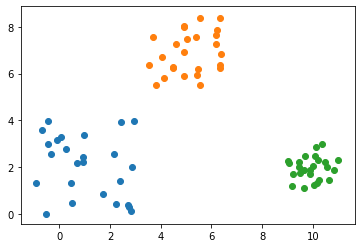

In [8]:
plot(easy_problem)

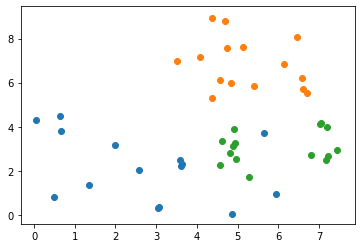

In [9]:
plot(hard_problem)

Task 2

In [10]:
def kmeans_cluster_assignment(
  k: int,
  points: ArrayLike,
  centres_guess: Optional[ArrayLike] = None,
  max_iterations: Optional[int] = None,
  tolerance: Optional[float] = None
) -> ArrayLike:
    if max_iterations == None:
        max_iterations = np.inf
    if tolerance == None:
        tolerance = -np.inf
    N = len(points[0])
    if centres_guess == None:
        current_centres = []
        for i in range(k):
            current_centre = np.random.random(2) * np.array([max(points[0]), max(points[1])])
            current_centres.append(current_centre)
    else:
        current_centres = centres_guess
    iterations = 0
    labels = np.zeros(N)
    flag = True
    while flag:
        diffs = []
        prev_labels = labels.copy()
        for i in range(N):
            point = np.array([points[0][i], points[1][i]])
            nearest_centre = min(range(k), key = lambda x: np.linalg.norm(point - current_centres[x]))
            labels[i] = nearest_centre
        for i in range(k):
            current_cluster = np.array([points[0][labels == i], points[1][labels == i]])
            current_centre = np.array([np.mean(current_cluster[0]), np.mean(current_cluster[1])])
            diffs.append(abs(current_centre - current_centres[i]))
            current_centres[i] = current_centre
        iterations += 1
        print(iterations)
        diff = np.mean(diffs)
        plot([points, labels])
        if np.all(labels == prev_labels):
            flag = False
        if iterations >= max_iterations:
            flag = False
        if diff < tolerance:
            flag = False
    return (labels, current_centres)

In [11]:
points = easy_problem[0]

Wall time: 0 ns
1


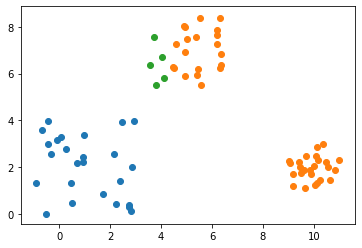

2


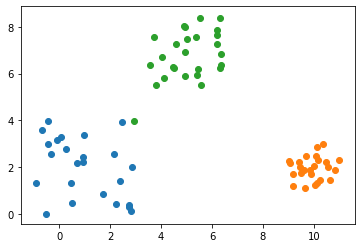

3


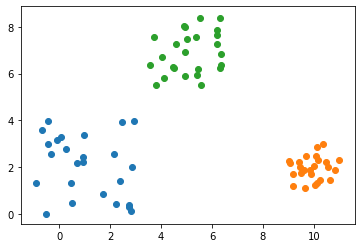

4


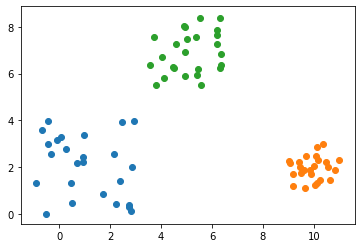

In [12]:
%time
res = kmeans_cluster_assignment(3, points)

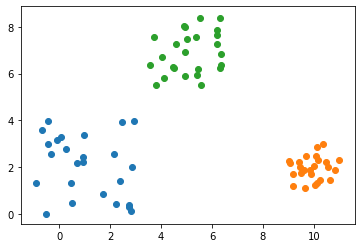

In [13]:
plot((points, res[0]))

Task 3

In [14]:
from scipy.cluster.vq import kmeans, whiten

In [15]:
features  = np.array(points).transpose()
whitened = whiten(features)

In [16]:
%%time
scipy_centres = kmeans(whitened, k_or_guess=3)[0]

Wall time: 18 ms


Mine k-means is faster than scipy (it looks strange)

In [17]:
print(scipy_centres)

array([[1.37422757, 2.77868536],
       [2.64814553, 0.79403304],
       [0.28228868, 0.83837097]])

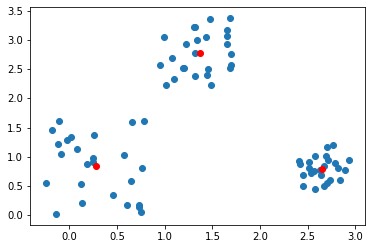

In [18]:
plt.scatter(whitened[:, 0], whitened[:, 1])
plt.scatter(scipy_centres[:, 0], scipy_centres[:, 1], c='r')
plt.show()